In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from src.utils import calc_4m

df = pd.read_csv("data/health_study_dataset.csv")

all_columns = ["age", "height", "weight", "systolic_bp", "cholesterol"]

calc_4m(df, all_columns)



,median,mean,min,max
age,50.00,49.43,18.0,90.00
height,171.35,171.85,144.4,200.40
weight,73.20,73.41,33.7,114.40
systolic_bp,149.40,149.18,106.8,185.90
cholesterol,4.97,4.93,2.5,7.88


<Axes: title={'center': 'Histogram över systoliskt blodtryck'}, xlabel='Systolic BP', ylabel='Antal'>

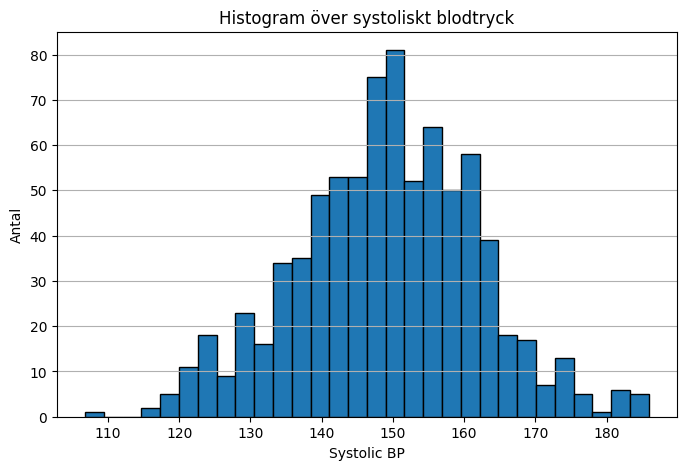

In [2]:
from src import viz as V
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))
V.histogram(ax, df["systolic_bp"], "Histogram över systoliskt blodtryck", "Systolic BP")